In [1]:
import pandas as pd
import numpy as np
import librosa
import cv2
import os
import glob
import seaborn as sns
from tqdm import tqdm
import IPython.display
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.io as pio
init_notebook_mode(connected=True)
pio.renderers.default = "notebook_connected"
import warnings
warnings.simplefilter("ignore")

import cosine_similarity as cs
import freq_dataset as fd
cos = cs.CosineSimilarity()
freq = fd.MakeFreqDataset()

s_path = "../../sounds/"

In [5]:
o_path = list(set(glob.glob(f'{s_path}*/*/*')))
path_ls = [file for file in o_path if file.endswith(".mp3") or file.endswith(".wav")]
name_ls = [name.split('/')[-1][:-4] for name in path_ls]
label_ls = [name.split('/')[-3] for name in path_ls]
info_df = pd.DataFrame()
info_df['path'] = path_ls
info_df['label'] = label_ls
info_df['name'] = name_ls
info_df.drop(info_df[info_df['label']=='1213'].index, inplace=True)
info_df.drop(info_df[info_df['label']=='animal'].index, inplace=True)
info_df

,path,label,name
0,../../sounds/human_voice/read_women/3_4368.wav,human_voice,3_4368
1,../../sounds/human_voice/read_women/2_1018.wav,human_voice,2_1018
3,../../sounds/human_voice/read_women/3_3540.wav,human_voice,3_3540
4,../../sounds/human_voice/read_men/bM32LJFpAus....,human_voice,bM32LJFpAus.0206
5,../../sounds/song/Hip-hop_Pop_Cool_gold vinyl_...,song,57_60
...,...,...,...
29562,../../sounds/human_voice/read_men/nVToV-zn_C4....,human_voice,nVToV-zn_C4.0578
29563,../../sounds/human_voice/read_men/bM32LJFpAus....,human_voice,bM32LJFpAus.0893
29564,../../sounds/human_voice/read_women/4_0459.wav,human_voice,4_0459
29565,../../sounds/song/Hip-hop_Pop_Crucial_Unforgiv...,song,27_30


In [6]:
info_df.groupby('label').count()

,path,name
label,,
human,909,909
human_voice,17746,17746
life,1312,1312
nature,216,216
song,4278,4278


In [7]:
import model_predict as mp
self = mp.ModelPredict()

총 2 개의 모델이 있습니다.
['models/RF_under3s_oversampling_91.pkl', 'models/RF_under3s_89.pkl']


In [8]:
result_df = pd.read_csv("../files/freq_dataset_1113.csv", encoding='utf-8-sig')
result_df.drop(["Unnamed: 0", "label"], axis=1, inplace=True)
result_df['cate1'] = [p.split('/')[-3] for p in result_df['path']]
result_df['cate2'] = [p.split('/')[-1][:3] if p.split('/')[-2] == 'cats_dogs' else p.split('/')[-2] for p in result_df['path']]
result_df.drop(result_df[result_df['cate2']=='cats_dog_add_noise'].index, axis=0, inplace=True)
result_df

,name,path,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,cate1,cate2
0,2-81731-A-10,../../sounds/nature/비 소리/2-81731-A-10.wav,5.000000,0.674077,0.040070,0.017677,0.000137,4827.324299,3.555906e+05,2919.121853,...,-8.264300,10.656216,-0.129912,18.339109,-6.612656,13.652373,-1.414367,12.971899,nature,비 소리
1,dr0shorse,../../sounds/animal/말 소리/dr0shorse.wav,1.353651,0.374280,0.095735,0.181595,0.006819,1492.603731,8.567513e+04,955.614463,...,12.378535,56.651711,-10.243791,28.035650,-3.035161,78.115898,1.781476,150.969696,animal,말 소리
2,4_5154,../../sounds/human_voice/read_women/4_5154.wav,3.204354,0.377328,0.119002,0.069964,0.005218,2189.041640,1.608823e+06,2243.653289,...,2.432036,255.817642,3.523569,398.191986,0.841104,213.776505,2.741883,295.803833,human_voice,read_women
3,3_4279,../../sounds/human_voice/read_women/3_4279.wav,4.226032,0.377279,0.117431,0.058191,0.002676,2218.915986,1.447482e+06,2197.490037,...,-5.125973,63.898540,-6.929226,80.169434,-4.769005,110.494026,1.924304,226.392563,human_voice,read_women
4,4_1533,../../sounds/human_voice/read_women/4_1533.wav,4.272472,0.388765,0.123725,0.067390,0.003615,2191.427527,1.798857e+06,2152.787600,...,-1.863418,78.053566,-4.694167,90.259575,-2.291460,137.207687,2.808920,252.813812,human_voice,read_women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22481,4_2959,../../sounds/human_voice/read_women/4_2959.wav,3.761633,0.388875,0.119760,0.063077,0.003298,2089.093858,1.532779e+06,2285.782330,...,0.489883,122.209114,2.708911,241.759460,-0.110318,289.090881,2.229165,200.966660,human_voice,read_women
22482,4_4776,../../sounds/human_voice/read_women/4_4776.wav,4.922630,0.389376,0.120424,0.060283,0.003562,2252.431213,1.408227e+06,2346.968945,...,1.021378,140.763046,2.365548,340.905365,3.520751,258.813538,6.935609,340.995605,human_voice,read_women
22484,3_0223,../../sounds/human_voice/read_women/3_0223.wav,3.962404,0.386296,0.117008,0.053361,0.002600,1734.906713,7.306648e+05,2028.096522,...,-2.970492,110.530266,0.416982,121.866516,-3.993134,216.351456,4.490475,311.396759,human_voice,read_women
22485,4_2431,../../sounds/human_voice/read_women/4_2431.wav,3.760544,0.382402,0.119962,0.066770,0.005187,2450.133809,1.635438e+06,2485.182914,...,-4.707453,52.939587,-3.391080,99.376076,-2.319468,124.156250,4.927099,332.130829,human_voice,read_women


In [18]:
merge_df = info_df.merge(result_df, how='left', on='path')
merge_df[merge_df['name_y'].isnull()].groupby(['label']).count()

,path,name_x,name_y,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,cate1,cate2
label,,,,,,,,,,,,,,,,,,,,,
song,4278,4278,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
song_freq_df = freq.make_frequency_df(info_df[info_df['label']=='song'])

100%|██████████| 4278/4278 [40:26<00:00,  1.76it/s]


In [4]:
result_df['duration'].describe()

count    21659.000000
mean         4.072488
std          2.465144
min          0.121043
25%          2.925714
50%          3.761633
75%          4.924875
max         84.177007
Name: duration, dtype: float64

In [5]:
result_df[result_df['duration']>20].groupby('cate1').count()

,name,path,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,cate2
cate1,,,,,,,,,,,,,,,,,,,,,
animal,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
human,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
life,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
nature,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


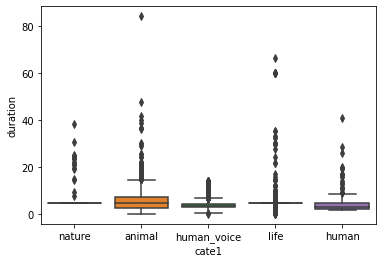

In [21]:
sns.boxplot(data=result_df, x='cate1', y='duration');

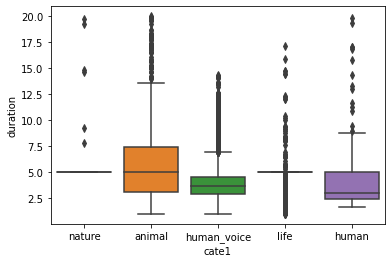

In [25]:
sns.boxplot(data=result_df[result_df['duration']<20][result_df['duration']>1], x='cate1', y='duration');

In [6]:
result_df.groupby('cate1').mean()

,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
cate1,,,,,,,,,,,,,,,,,,,,,
animal,6.127727,0.388857,0.092428,0.090176,0.006496,1875.329031,3.503684e+05,1596.249710,167690.134487,3345.425925,...,-1.789334,75.627094,-0.194609,69.662531,-1.460799,65.601995,-1.090840,70.670183,0.419428,75.626683
human,3.788468,0.459507,0.086172,0.041938,0.004188,2011.173185,6.433066e+05,1821.638875,230282.064195,3930.944736,...,-3.054786,80.558525,2.480808,65.614724,-2.010526,68.535233,0.434484,61.183435,0.654939,61.014285
human_voice,3.817196,0.394654,0.112838,0.060850,0.003488,2021.143759,1.224849e+06,2152.011420,454517.494139,4049.586490,...,-3.433572,92.702714,-0.492309,103.638538,-1.384088,149.992550,-1.328569,150.492476,2.953969,179.365668
life,5.059129,0.480956,0.074706,0.068472,0.003638,2473.136027,9.850764e+05,2131.587310,373203.942804,4743.353308,...,1.915560,31.103690,-1.150211,30.254837,2.145917,30.355996,-1.252533,33.453104,2.179815,30.956517
nature,6.204728,0.559353,0.060110,0.068749,0.002420,2632.020838,1.941603e+05,2088.877403,102033.395547,4735.111962,...,-1.191501,21.908848,-0.463164,20.680098,-1.070060,21.029369,-1.618563,21.766757,1.090146,20.124232


In [7]:
result_df[result_df['duration']>20].groupby('cate1').count()

,name,path,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,cate2
cate1,,,,,,,,,,,,,,,,,,,,,
animal,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
human,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
life,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
nature,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [8]:
result_df[result_df['duration']<1].groupby('cate1').count()

,name,path,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,cate2
cate1,,,,,,,,,,,,,,,,,,,,,
animal,85,85,85,85,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,85
human_voice,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
life,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82


In [9]:
long_out = result_df[result_df['duration']>20].index.tolist()
short_out = result_df[result_df['duration']<1].index.tolist()
print("너무 긴 outlier 제외: ", len(long_out))
print("너무 짧은 outlier 제외: ", len(short_out))

너무 긴 outlier 제외:  67
너무 짧은 outlier 제외:  188


In [10]:
final_df = result_df.drop(long_out+short_out, axis=0)
final_df

,name,path,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,cate1,cate2
0,2-81731-A-10,../../sounds/nature/비 소리/2-81731-A-10.wav,5.000000,0.674077,0.040070,0.017677,0.000137,4827.324299,3.555906e+05,2919.121853,...,-8.264300,10.656216,-0.129912,18.339109,-6.612656,13.652373,-1.414367,12.971899,nature,비 소리
1,dr0shorse,../../sounds/animal/말 소리/dr0shorse.wav,1.353651,0.374280,0.095735,0.181595,0.006819,1492.603731,8.567513e+04,955.614463,...,12.378535,56.651711,-10.243791,28.035650,-3.035161,78.115898,1.781476,150.969696,animal,말 소리
2,4_5154,../../sounds/human_voice/read_women/4_5154.wav,3.204354,0.377328,0.119002,0.069964,0.005218,2189.041640,1.608823e+06,2243.653289,...,2.432036,255.817642,3.523569,398.191986,0.841104,213.776505,2.741883,295.803833,human_voice,read_women
3,3_4279,../../sounds/human_voice/read_women/3_4279.wav,4.226032,0.377279,0.117431,0.058191,0.002676,2218.915986,1.447482e+06,2197.490037,...,-5.125973,63.898540,-6.929226,80.169434,-4.769005,110.494026,1.924304,226.392563,human_voice,read_women
4,4_1533,../../sounds/human_voice/read_women/4_1533.wav,4.272472,0.388765,0.123725,0.067390,0.003615,2191.427527,1.798857e+06,2152.787600,...,-1.863418,78.053566,-4.694167,90.259575,-2.291460,137.207687,2.808920,252.813812,human_voice,read_women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22481,4_2959,../../sounds/human_voice/read_women/4_2959.wav,3.761633,0.388875,0.119760,0.063077,0.003298,2089.093858,1.532779e+06,2285.782330,...,0.489883,122.209114,2.708911,241.759460,-0.110318,289.090881,2.229165,200.966660,human_voice,read_women
22482,4_4776,../../sounds/human_voice/read_women/4_4776.wav,4.922630,0.389376,0.120424,0.060283,0.003562,2252.431213,1.408227e+06,2346.968945,...,1.021378,140.763046,2.365548,340.905365,3.520751,258.813538,6.935609,340.995605,human_voice,read_women
22484,3_0223,../../sounds/human_voice/read_women/3_0223.wav,3.962404,0.386296,0.117008,0.053361,0.002600,1734.906713,7.306648e+05,2028.096522,...,-2.970492,110.530266,0.416982,121.866516,-3.993134,216.351456,4.490475,311.396759,human_voice,read_women
22485,4_2431,../../sounds/human_voice/read_women/4_2431.wav,3.760544,0.382402,0.119962,0.066770,0.005187,2450.133809,1.635438e+06,2485.182914,...,-4.707453,52.939587,-3.391080,99.376076,-2.319468,124.156250,4.927099,332.130829,human_voice,read_women


count    21404.000000
mean         4.015808
std          1.753654
min          1.000590
25%          2.940000
50%          3.780000
75%          4.922744
max         19.957551
Name: duration, dtype: float64


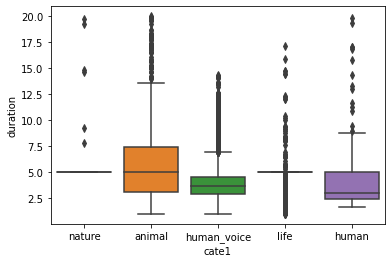

In [11]:
print(final_df['duration'].describe())
sns.boxplot(data=final_df, x='cate1', y='duration');

---
# 분류

In [12]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
import pickle
import joblib
import seaborn as sns

In [13]:
def play_song(path):
    (file_dir, file_id) = os.path.split(path)
    print(file_id[:-4])
    print(IPython.display.display(IPython.display.Audio(path)))
def play_song_ls(cm_lr_df):
    for idx, path in enumerate(cm_lr_df['path']):
        print(cm_lr_df['pred'].iloc[idx])
        play_song(path)

In [14]:
def make_train_test(df):
    df = df.sample(frac=1)
    X = df.set_index('path').drop(['name','cate1','cate2','duration'], axis=1)
    y = df.set_index('path')[['cate1']].copy()
    print(f"X 개수:{len(X)}, y 개수:{len(y)}")
    print(df.groupby('cate1').count().sort_values('name')[['name']])
    return X, y

In [15]:
def model_fit_kfold(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cf = confusion_matrix(y_test, y_pred)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
    print("accuracy:", round(accuracy_score(y_test, y_pred),6))
    print("recall:", round(recall_score(y_test, y_pred, labels=np.unique(y_test), average='macro'),6))
    print("f1 score:", round(f1_score(y_test, y_pred, labels=np.unique(y_test), average='macro'),6))
#     print("Cross Validation Score:", cross_val_score(model, pd.concat([X_train, X_test]), pd.concat([y_train, y_test]), cv=kfold))
    ax = sns.heatmap(cf, annot=True, xticklabels=np.unique(y), yticklabels=np.unique(y), fmt="d", cmap="Blues")
    plt.title(str(model).split('(')[0])
    plt.show()
    return model, y_pred

In [16]:
def check_false_pred(y_pred):
    cm_lr_df = pd.DataFrame()
    cm_lr_df['answer'] = y_test['cate1'].tolist()
    cm_lr_df['pred'] = y_pred
    cm_lr_df['result'] = cm_lr_df['answer'] == cm_lr_df['pred']
    cm_lr_df['path'] = X_test.index
    cm_lr_df['cate1'] = [result_df[result_df['path']== p]['cate1'].iloc[0] for p in cm_lr_df['path']]
#     cm_lr_df['noise'] = [result_df[result_df['path']== p]['noise'].iloc[0] for p in cm_lr_df['path']]
#     cm_lr_df['name'] = [f"{p.split('/')[-2]}__{p.split('/')[-1][:-4]}" for p in cm_lr_df['path']]
#     [l.split('/')[-1]for l in cm_lr_df['path']]
    cm_lr_df = cm_lr_df[cm_lr_df['result']==False].sort_values(['answer', 'cate1'])
    return cm_lr_df

---
# Total songs

### Test dataset 만들기

In [17]:
### random samping으로 라벨별 test 데이터 뽑아두기
test_df = result_df.copy()
test_nature = test_df[test_df['cate1']=='nature'].sample(n=100, random_state=1)
test_human = test_df[test_df['cate1']=='human'].sample(n=100, random_state=13)
test_life = test_df[test_df['cate1']=='life'].sample(n=100, random_state=13)
test_animal = test_df[test_df['cate1']=='animal'].sample(n=100, random_state=13)
test_human_voice = test_df[test_df['cate1']=='human_voice'].sample(n=100, random_state=13)
test_df = pd.concat([test_nature, test_human,test_life, test_animal, test_human_voice])
test_df.groupby('cate1').count().sort_values('name')[['name']]

,name
cate1,
animal,100
human,100
human_voice,100
life,100
nature,100


In [18]:
X_test, y_test = make_train_test(test_df)

X 개수:500, y 개수:500
             name
cate1            
animal        100
human         100
human_voice   100
life          100
nature        100


In [19]:
train_df = result_df.drop(test_df.index, axis=0)
train_df.groupby('cate1').count().sort_values('name')[['name']]

,name
cate1,
nature,116
human,809
life,1212
animal,1376
human_voice,17646


X 개수:21159, y 개수:21159
              name
cate1             
nature         116
human          809
life          1212
animal        1376
human_voice  17646
---------LogisticRegression---------------
accuracy: 0.234
recall: 0.234
f1 score: 0.116616


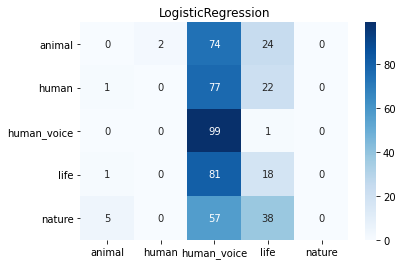

---------DecisionTreeClassifier---------------
accuracy: 0.648
recall: 0.648
f1 score: 0.639966


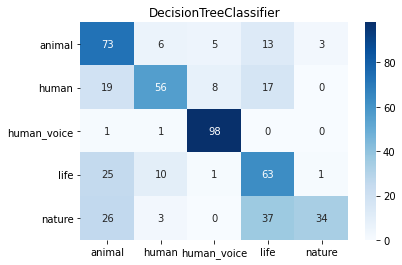

---------XGBClassifier---------------
accuracy: 0.772
recall: 0.772
f1 score: 0.76173


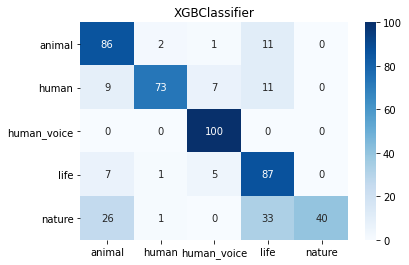

---------RandomForestClassifier---------------
accuracy: 0.692
recall: 0.692
f1 score: 0.674863


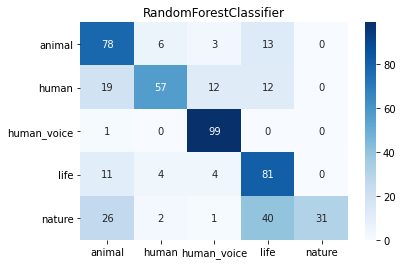

In [92]:
X_train, y_train = make_train_test(train_df)
print("---------LogisticRegression---------------")
lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

### 1. 5개의 라벨을 모두 같은 개수로 맞춰서 테스트
- groupby().sample
- RandomUnderSampler

In [57]:
# 방법1: pandas의 groupby().sample으로 라벨별 개수 맞추기
try1_df = train_df.groupby('cate1').sample(n=116, random_state=13)
X_train, y_train = make_train_test(try1_df)
print('------------------------')
X, y = make_train_test(pd.concat([test_df, try1_df]))

X 개수:580, y 개수:580
             name
cate1            
animal        116
human         116
human_voice   116
life          116
nature        116
------------------------
X 개수:1080, y 개수:1080
             name
cate1            
animal        216
human         216
human_voice   216
life          216
nature        216


---------LogisticRegression---------------
accuracy: 0.462
recall: 0.462
f1 score: 0.412682
Cross Validation Score: [0.43055556 0.43055556 0.35185185 0.41203704 0.47685185]


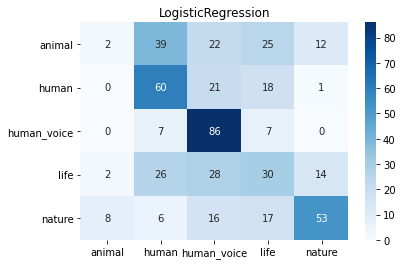

---------DecisionTreeClassifier---------------
accuracy: 0.596
recall: 0.596
f1 score: 0.598199
Cross Validation Score: [0.59722222 0.60648148 0.63425926 0.66666667 0.60185185]


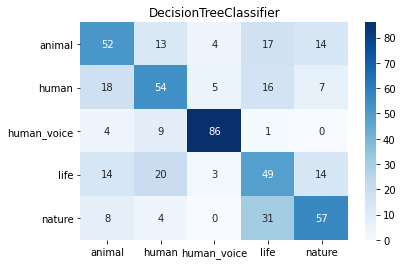

---------XGBClassifier---------------
accuracy: 0.758
recall: 0.758
f1 score: 0.756813
Cross Validation Score: [0.75925926 0.78240741 0.80555556 0.76388889 0.81481481]


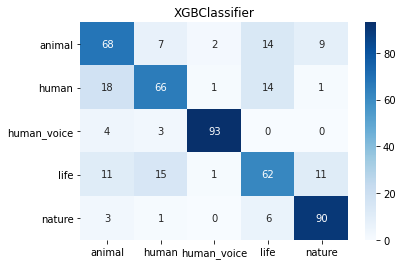

---------RandomForestClassifier---------------
accuracy: 0.708
recall: 0.708
f1 score: 0.710423
Cross Validation Score: [0.68055556 0.70833333 0.71759259 0.68055556 0.73611111]


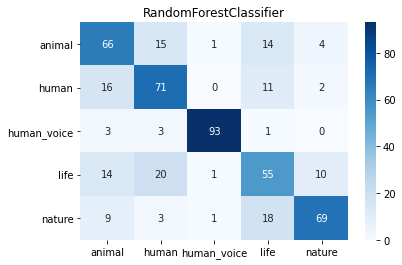

In [58]:
print("---------LogisticRegression---------------")
lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

### 2. 모델 파라미터에 weights 적용하기
- abnomal 데이터에서 oversamping, undersamping 같은 개념으로 class_weights를 주어 라벨별 불균형을 맞출 수 있음
- 샘플링을 하지 않고, 개수가 제일 많은 human_voice을 기준점으로 두고 weights 적용
- life	99
animal	341
human	513
human_voice	9548
- oversampling, undersampling 대비 정확도가 대체로 낮으므로 테스트 대상에서 제외

In [61]:
weights = {'animal': 5, 'human': 4, 'life': 6, 'nature': 20}
X, y = make_train_test(result_df)
X_test, y_test = make_train_test(test_df)
train_df = result_df.drop(test_df.index, axis=0)
print("---------LogisticRegression---------------")
lr_model, lr_y_pred = model_fit_kfold(LogisticRegression(class_weight=weights))
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier(class_weight=weights))
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss',
                                           scale_pos_weight=10))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(class_weight=weights,
                                                             n_estimators=10, random_state=13, oob_score=True))

X 개수:21659, y 개수:21659
              name
cate1             
nature         216
human          909
life          1312
animal        1476
human_voice  17746
X 개수:500, y 개수:500
             name
cate1            
animal        100
human         100
human_voice   100
life          100
nature        100


### 3. oversamping - imblearn.ADASYN
- SMOTE에 비해 ADASYN이 조금 더 사실적으로 데이터 간의 분산을 넣어 오버샘플링해준다 함

In [63]:
X_test, y_test = make_train_test(test_df)
train_df = result_df.drop(test_df.index, axis=0)
X_train, y_train = make_train_test(train_df)
X_train, y_train = ADASYN(random_state=13).fit_resample(X_train, y_train) # oversamping
y_train.reset_index().groupby('cate1').count()

X 개수:500, y 개수:500
             name
cate1            
animal        100
human         100
human_voice   100
life          100
nature        100
X 개수:21159, y 개수:21159
              name
cate1             
nature         116
human          809
life          1212
animal        1376
human_voice  17646


,index
cate1,
animal,17611
human,17564
human_voice,17646
life,17972
nature,17622


---------LogisticRegression---------------
accuracy: 0.478
recall: 0.478
f1 score: 0.422574


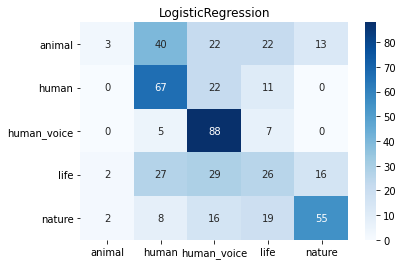

---------DecisionTreeClassifier---------------
accuracy: 0.682
recall: 0.682
f1 score: 0.669602


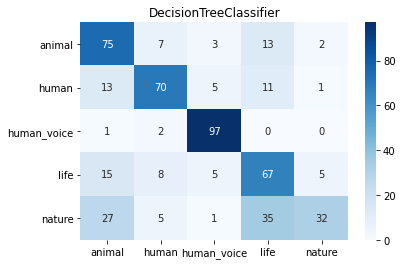

---------XGBClassifier---------------
accuracy: 0.838
recall: 0.838
f1 score: 0.838473


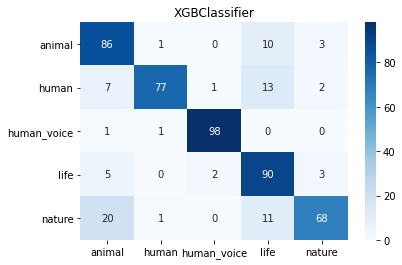

---------RandomForestClassifier---------------
accuracy: 0.748
recall: 0.748
f1 score: 0.740926


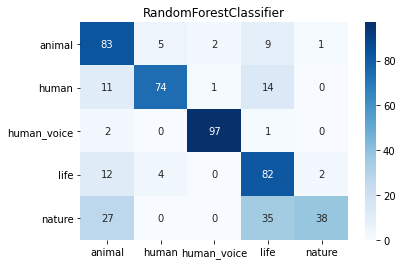

In [66]:
print("---------LogisticRegression---------------")
lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

---
# short_df
- 노래 길이 백분위 50% 미만 데이터 기준

10701
cate1
animal          391
human           563
human_voice    9598
life            149
Name: duration, dtype: int64
count    10701.000000
mean         2.852067
std          0.632534
min          1.000590
25%          2.422540
50%          2.940000
75%          3.389025
max          3.779002
Name: duration, dtype: float64


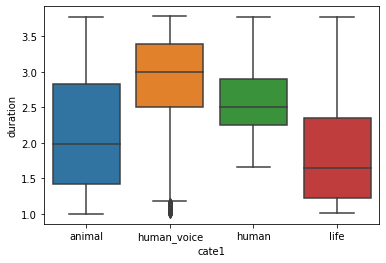

In [21]:
short_df = final_df[final_df['duration']<np.percentile(final_df['duration'], 50)]#[final_df['duration']>np.percentile(final_df['duration'], 25)]
print(len(short_df))
print(short_df.groupby('cate1')['duration'].count())
print(short_df['duration'].describe())
sns.boxplot(data=short_df, x='cate1', y='duration');

## Test dataset 만들기

In [22]:
### random samping으로 라벨별 test 데이터 뽑아두기
test_df = short_df.copy()
# test_df.drop(result_df[result_df['cate2']=='영어리딩'].index, axis=0, inplace=True)
# test_nature = test_df[test_df['cate1']=='nature'].sample(n=80, random_state=1)
test_human = test_df[test_df['cate1']=='human'].sample(n=50, random_state=13)
test_life = test_df[test_df['cate1']=='life'].sample(n=50, random_state=13)
test_animal = test_df[test_df['cate1']=='animal'].sample(n=50, random_state=13)
test_human_voice = test_df[test_df['cate1']=='human_voice'].sample(n=50, random_state=13)
test_df = pd.concat([test_human,test_life, test_animal, test_human_voice]) #test_nature 
test_df.groupby('cate1').count().sort_values('name')[['name']]

,name
cate1,
animal,50
human,50
human_voice,50
life,50


In [23]:
X_test, y_test = make_train_test(test_df)

X 개수:200, y 개수:200
             name
cate1            
animal         50
human          50
human_voice    50
life           50


In [24]:
train_df = short_df.drop(test_df.index, axis=0)
train_df.groupby('cate1').count().sort_values('name')[['name']]

,name
cate1,
life,99
animal,341
human,513
human_voice,9548


### 1. 5개의 라벨을 모두 같은 개수로 맞춰서 테스트
- groupby().sample
- RandomUnderSampler

In [25]:
# 방법1: pandas의 groupby().sample으로 라벨별 개수 맞추기
try1_df = train_df.groupby('cate1').sample(n=82, random_state=13)
X_train, y_train = make_train_test(try1_df)
print('------------------------')
X, y = make_train_test(pd.concat([test_df, try1_df]))

X 개수:328, y 개수:328
             name
cate1            
animal         82
human          82
human_voice    82
life           82
------------------------
X 개수:528, y 개수:528
             name
cate1            
animal        132
human         132
human_voice   132
life          132


---------LogisticRegression---------------
accuracy: 0.47
recall: 0.47
f1 score: 0.429884


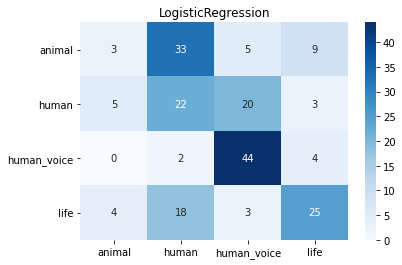

---------DecisionTreeClassifier---------------
accuracy: 0.78
recall: 0.78
f1 score: 0.780586


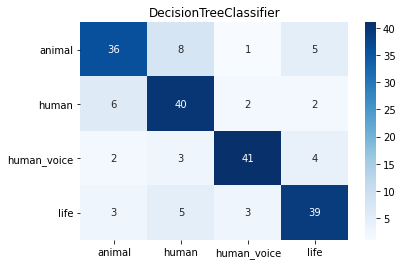

---------XGBClassifier---------------
accuracy: 0.93
recall: 0.93
f1 score: 0.930028


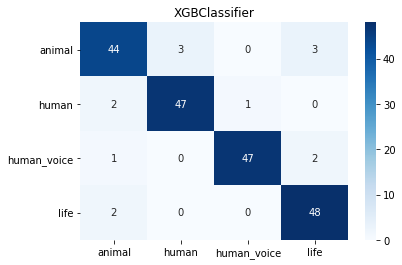

---------RandomForestClassifier---------------
accuracy: 0.89
recall: 0.89
f1 score: 0.890247


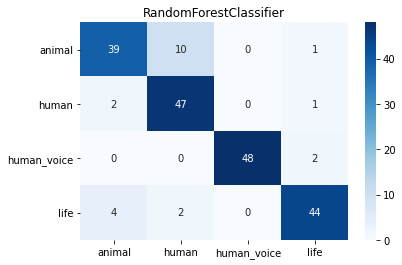

In [112]:
print("---------LogisticRegression---------------")
lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

---------RandomForestClassifier---------------
accuracy: 0.89
recall: 0.89
f1 score: 0.890178


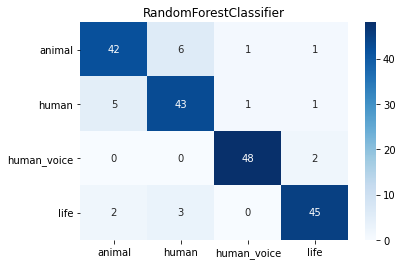

['models/RF_under3s_89.pkl']

In [27]:
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))
# 모델 저장
joblib.dump(rf_model, 'models/RF_under3s_89.pkl')

### 2. 모델 파라미터에 weights 적용하기
- abnomal 데이터에서 oversamping, undersamping 같은 개념으로 class_weights를 주어 라벨별 불균형을 맞출 수 있음
- 샘플링을 하지 않고, 개수가 제일 많은 human_voice을 기준점으로 두고 weights 적용
- life	99
animal	341
human	513
human_voice	9548

In [49]:
weights = {'animal': 5, 'human': 4, 'life': 6} #, 'nature': 20}
X, y = make_train_test(short_df)
X_test, y_test = make_train_test(test_df)
train_df = result_df.drop(test_df.index, axis=0)

print("---------LogisticRegression---------------")
lr_model, lr_y_pred = model_fit_kfold(LogisticRegression(class_weight=weights))
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier(class_weight=weights))
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss',
                                           scale_pos_weight=10))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(class_weight=weights,
                                                             n_estimators=10, random_state=13, oob_score=True))

X 개수:10701, y 개수:10701
             name
cate1            
life          149
animal        391
human         563
human_voice  9598
X 개수:200, y 개수:200
             name
cate1            
animal         50
human          50
human_voice    50
life           50


### 3. oversamping - imblearn.ADASYN
- SMOTE에 비해 ADASYN이 조금 더 사실적으로 데이터 간의 분산을 넣어 오버샘플링해준다 함

In [32]:
X_test, y_test = make_train_test(test_df)
train_df = short_df.drop(test_df.index, axis=0)
X_train, y_train = make_train_test(train_df)
X_train, y_train = ADASYN(random_state=1).fit_resample(X_train, y_train) # oversamping
y_train.reset_index().groupby('cate1').count()

X 개수:200, y 개수:200
             name
cate1            
animal         50
human          50
human_voice    50
life           50
X 개수:10501, y 개수:10501
             name
cate1            
life           99
animal        341
human         513
human_voice  9548


,index
cate1,
animal,9485
human,9533
human_voice,9548
life,9528


---------LogisticRegression---------------
accuracy: 0.5
recall: 0.5
f1 score: 0.422563
Cross Validation Score: [0.52526439 0.51142447 0.52696174 0.53936545 0.54557326]


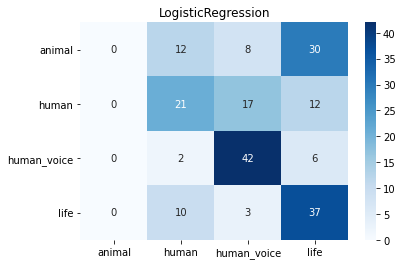

---------DecisionTreeClassifier---------------
accuracy: 0.79
recall: 0.79
f1 score: 0.785935
Cross Validation Score: [0.98746573 0.98890195 0.98733516 0.9872046  0.98916166]


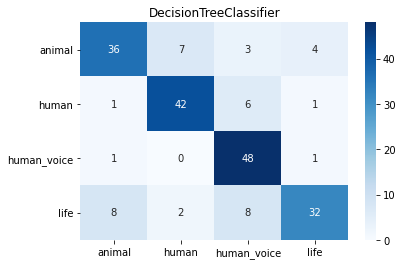

---------XGBClassifier---------------
accuracy: 0.965
recall: 0.965
f1 score: 0.964677
Cross Validation Score: [0.99869435 0.99895548 0.99778039 0.99895548 0.99882476]


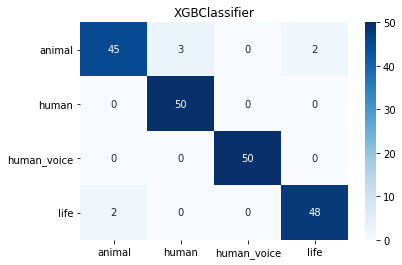

---------RandomForestClassifier---------------
accuracy: 0.915
recall: 0.915
f1 score: 0.913763
Cross Validation Score: [0.99686643 0.99738869 0.9966053  0.99725813 0.99764952]


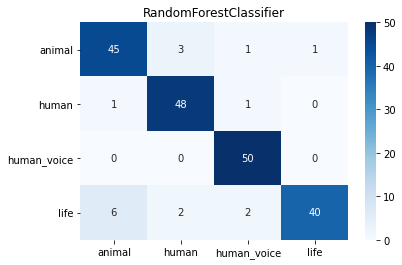

In [52]:
print("---------LogisticRegression---------------")
lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

---------RandomForestClassifier---------------
accuracy: 0.93
recall: 0.93
f1 score: 0.929704


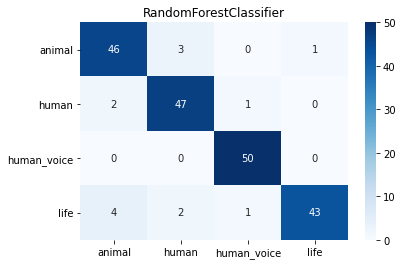

['models/RF_under3s_oversampling_93.pkl']

In [34]:
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))
# 모델 저장: 정확도 88~93
joblib.dump(rf_model, 'models/RF_under3s_oversampling_93.pkl')

---
# long_df
- 노래 길이 백분위 50% 이상 데이터 기준

10703
cate1
animal          968
human           342
human_voice    8127
life           1060
nature          206
Name: duration, dtype: int64
count    10703.000000
mean         5.179331
std          1.744195
min          3.780000
25%          4.272472
50%          4.922630
75%          5.220000
max         19.957551
Name: duration, dtype: float64


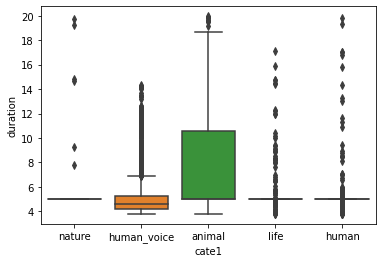

In [35]:
long_df = final_df[final_df['duration']>=np.percentile(final_df['duration'], 50)]#[final_df['duration']<=np.percentile(final_df['duration'], 75)]
print(len(long_df))
print(long_df.groupby('cate1')['duration'].count())
print(long_df['duration'].describe())
sns.boxplot(data=long_df, x='cate1', y='duration');

In [36]:
X, y = make_train_test(long_df)

X 개수:10703, y 개수:10703
             name
cate1            
nature        206
human         342
animal        968
life         1060
human_voice  8127


## Test dataset 만들기

In [37]:
### random samping으로 라벨별 test 데이터 뽑아두기
test_df = long_df.copy()
# test_df.drop(result_df[result_df['cate2']=='영어리딩'].index, axis=0, inplace=True)
# test_nature = test_df[test_df['cate1']=='nature'].sample(n=10, random_state=1)
test_human = test_df[test_df['cate1']=='human'].sample(n=100, random_state=1)
test_life = test_df[test_df['cate1']=='life'].sample(n=100, random_state=1)
test_animal = test_df[test_df['cate1']=='animal'].sample(n=100, random_state=1)
test_human_voice = test_df[test_df['cate1']=='human_voice'].sample(n=100, random_state=1)
test_df = pd.concat([test_human, test_life, test_animal, test_human_voice]) #test_nature, 
test_df.groupby('cate1').count().sort_values('name')[['name']]

,name
cate1,
animal,100
human,100
human_voice,100
life,100


In [38]:
X_test, y_test = make_train_test(test_df)

X 개수:400, y 개수:400
             name
cate1            
animal        100
human         100
human_voice   100
life          100


In [39]:
train_df = long_df.drop(test_df.index, axis=0)
train_df.groupby('cate1').count().sort_values('name')[['name']]

,name
cate1,
nature,206
human,242
animal,868
life,960
human_voice,8027


### 1. 5개의 라벨을 모두 같은 개수로 맞춰서 테스트
- groupby().sample
- RandomUnderSampler

In [40]:
# 방법1: pandas의 groupby().sample으로 라벨별 개수 맞추기
try1_df = train_df.groupby('cate1').sample(n=206, random_state=13)
X_train, y_train = make_train_test(try1_df)
print('------------------------')
X, y = make_train_test(pd.concat([test_df, try1_df]))

X 개수:1030, y 개수:1030
             name
cate1            
animal        206
human         206
human_voice   206
life          206
nature        206
------------------------
X 개수:1430, y 개수:1430
             name
cate1            
nature        206
animal        306
human         306
human_voice   306
life          306


---------LogisticRegression---------------
accuracy: 0.39
recall: 0.39
f1 score: 0.342917


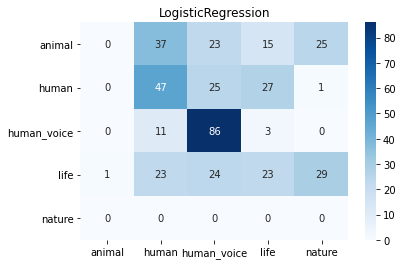

---------DecisionTreeClassifier---------------
accuracy: 0.6325
recall: 0.6325
f1 score: 0.65291


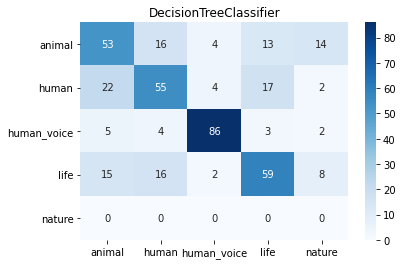

---------XGBClassifier---------------
accuracy: 0.7125
recall: 0.7125
f1 score: 0.72857


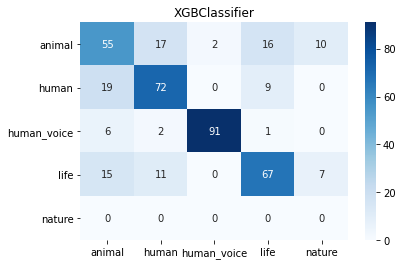

---------RandomForestClassifier---------------
accuracy: 0.6375
recall: 0.6375
f1 score: 0.654289


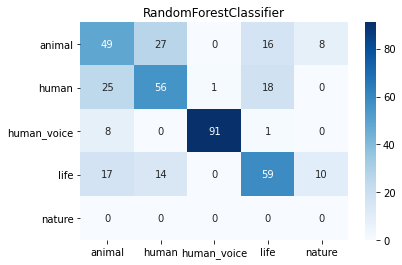

In [140]:
print("---------LogisticRegression---------------")
lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

---------RandomForestClassifier---------------
accuracy: 0.64
recall: 0.64
f1 score: 0.658059


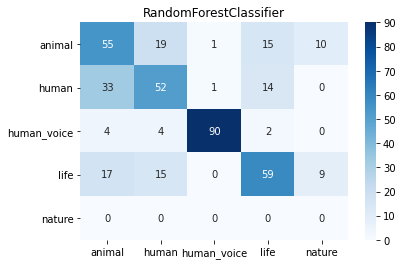

['models/RF_over3s_64.pkl']

In [42]:
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))
# 모델 저장: 정확도 64
joblib.dump(rf_model, 'models/RF_over3s_64.pkl')

### 2. 모델 파라미터에 weights 적용하기
- abnomal 데이터에서 oversamping, undersamping 같은 개념으로 class_weights를 주어 라벨별 불균형을 맞출 수 있음
- 샘플링을 하지 않고, 개수가 제일 많은 human_voice을 기준점으로 두고 weights 적용
- life	91
human	308
animal	521
human_voice	10870

In [187]:
# weights = {'animal': 3, 'human': 4, 'life': 2.5} #, 'nature': 20}
# X, y = make_train_test(long_df)
# X_test, y_test = make_train_test(test_df)
# train_df = result_df.drop(test_df.index, axis=0)

# print("---------LogisticRegression---------------")
# lr_model, lr_y_pred = model_fit_kfold(LogisticRegression(class_weight=weights))
# print("---------DecisionTreeClassifier---------------")
# dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier(class_weight=weights))
# print("---------XGBClassifier---------------")
# xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
#                                            learning_rate=0.1,
#                                            eval_metric='mlogloss',
#                                            scale_pos_weight=10))
# print("---------RandomForestClassifier---------------")
# rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(class_weight=weights,
#                                                              n_estimators=10, random_state=13, oob_score=True))

X 개수:10020, y 개수:10020
             name
cate1            
nature        206
human         404
life          995
animal       1371
human_voice  7044
X 개수:450, y 개수:450
             name
cate1            
life           50
animal        100
human_voice   100
human         200


### 3. oversamping - imblearn.ADASYN
- SMOTE에 비해 ADASYN이 조금 더 사실적으로 데이터 간의 분산을 넣어 오버샘플링해준다 함

In [43]:
X_test, y_test = make_train_test(test_df)
train_df = long_df.drop(test_df.index, axis=0)
X_train, y_train = make_train_test(train_df)
X_train, y_train = ADASYN(random_state=13).fit_resample(X_train, y_train) # oversamping
y_train.reset_index().groupby('cate1').count()

X 개수:400, y 개수:400
             name
cate1            
animal        100
human         100
human_voice   100
life          100
X 개수:10303, y 개수:10303
             name
cate1            
nature        206
human         242
animal        868
life          960
human_voice  8027


,index
cate1,
animal,8073
human,8083
human_voice,8027
life,7941
nature,8058


---------LogisticRegression---------------
accuracy: 0.375
recall: 0.375
f1 score: 0.338722


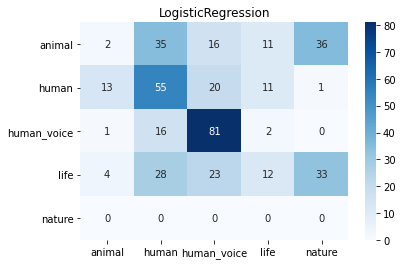

---------DecisionTreeClassifier---------------
accuracy: 0.6775
recall: 0.6775
f1 score: 0.680958


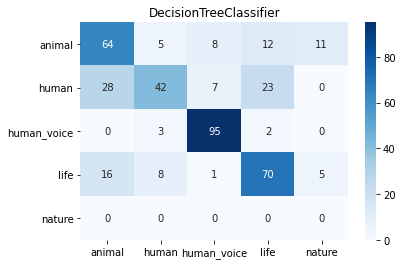

---------XGBClassifier---------------
accuracy: 0.8025
recall: 0.8025
f1 score: 0.808005


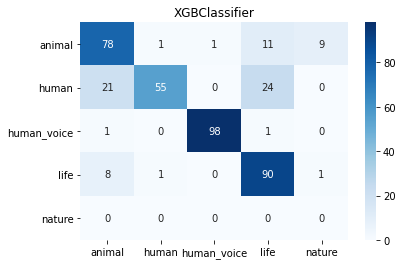

---------RandomForestClassifier---------------
accuracy: 0.75
recall: 0.75
f1 score: 0.755178


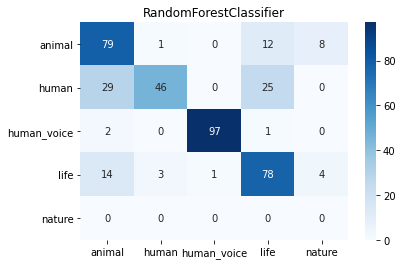

In [142]:
print("---------LogisticRegression---------------")
lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

---------RandomForestClassifier---------------
accuracy: 0.7575
recall: 0.7575
f1 score: 0.764255


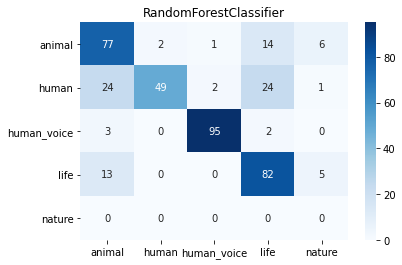

['models/RF_over3s_oversampling_75.pkl']

In [44]:
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))
# 모델 저장: 정확도 75
joblib.dump(rf_model, 'models/RF_over3s_oversampling_75.pkl')

---
## 모델 저장하기
- short song
- long song